# Computational Social Science Project #3 

**Takun Wang**

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
# load libraries
# ----
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data preprocessing
from sklearn.preprocessing import LabelBinarizer

# models trained
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# hyperparameters tuning
from sklearn.model_selection import KFold, GridSearchCV

# model evaluation & selection
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

!pip freeze

anyio==4.0.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
arviz==0.16.1
asttokens==2.2.1
async-lru==2.0.4
attrs==23.1.0
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.1.0
cachetools==5.3.1
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.3.2
cloudpickle==3.0.0
comm==0.1.4
cons==0.4.6
contourpy==1.1.0
cycler==0.11.0
debugpy==1.6.7.post1
decorator==5.1.1
defusedxml==0.7.1
etuples==0.3.9
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.1
fastprogress==1.0.3
filelock==3.12.4
fonttools==4.42.1
fqdn==1.5.1
graphviz==0.20.1
h5netcdf==1.2.0
h5py==3.10.0
idna==3.4
ipykernel==6.25.1
ipython==8.14.0
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.3.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.2
jsonschema-specifications==2023.7.1
jupyter-events==0.8.0
jupyter-lsp==2.2.0
jupyter_client==8.3.0
jupyter_core==5.3.1
jupyter_server==2.9.1
jupyter_server_terminals==0.4.4
jupyterlab==4.0.7
jupyterlab-pygments==0.2.2
jupyterlab

In [2]:
# read the data
# ----
inspect = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                          low_memory=False)

# also the 2014 data (as test set)
inspect_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv", 
                                  low_memory=False)

In [3]:
# shape of data
inspect.shape

(17677, 75)

In [4]:
# head rows of data
inspect.head(3)

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.90,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.55,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.55,12.611239,8.004220,8.320330,0


In [5]:
# list column names
inspect.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# drop columns (geography, identification, pass/fail flags, etc.)
# ----
inspect = inspect.drop(columns = ['AKA_Name', 'License',
                                  'Facility_Type', # drop
                                  'Address', 'City', 'State','Zip',
                                  'Latitude', 'Longitude', 'Location',
                                  'ID', 'LICENSE_ID','LICENSE_TERM_START_DATE',
                                  #'LICENSE_TERM_EXPIRATION_DATE',
                                  'LICENSE_STATUS',
                                  'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME',
                                  'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
                                  #'WARD',
                                  'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT',
                                  'LICENSE_CODE',
                                  'LICENSE_DESCRIPTION', #drop
                                  'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
                                  'LICENSE_NUMBER',
                                  'LATITUDE',
                                  'LONGITUDE',
                                  'minDate',  # drop
                                  'maxDate',  # drop
                                  'pass_flag', 'fail_flag'])

# set index
inspect = inspect.set_index(['Inspection_ID', 'DBA_Name'])

In [7]:
# data types
inspect.dtypes

Inspection_Date                                 object
Risk                                            object
Inspection_Type                                 object
Results                                         object
Facility_Type_Clean                             object
criticalCount                                    int64
seriousCount                                     int64
minorCount                                       int64
pastFail                                         int64
pastCritical                                     int64
pastSerious                                      int64
pastMinor                                        int64
timeSinceLast                                  float64
firstRecord                                      int64
WARD                                           float64
APPLICATION_TYPE                                object
LICENSE_TERM_EXPIRATION_DATE                    object
ageAtInspection                                float64
consumptio

In [8]:
# convert date variables to a datetime format
# ----
inspect['Inspection_Date'] = pd.to_datetime(inspect['Inspection_Date']) 
inspect['LICENSE_TERM_EXPIRATION_DATE'] = pd.to_datetime(inspect['LICENSE_TERM_EXPIRATION_DATE']) 

In [9]:
# create variable "days before license expiration"
inspect['lic_exp_days'] = (inspect['LICENSE_TERM_EXPIRATION_DATE'] - inspect['Inspection_Date']).dt.days

In [10]:
# create outcome variable
# ----
# create binary outcome "fail" (include both "pass w/ conditions" and "fail")
# the reason of doing this will be explained in the data preprocessing session
inspect['fail'] = inspect['Results'].replace(['Pass','Pass w/ Conditions','Fail'],
                                               [0,1,1])

### Visualization

Let's visualize what inspections look like over time.

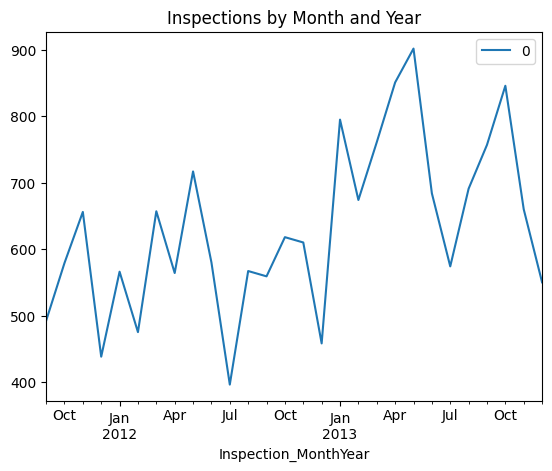

In [11]:
# visualize inspections over time
inspect['Inspection_MonthYear'] = inspect['Inspection_Date'].dt.to_period('M')
counts_MY = inspect.groupby('Inspection_MonthYear').size().reset_index()
counts_MY.set_index(["Inspection_MonthYear"], inplace = True)
counts_MY.plot(title = "Inspections by Month and Year");

Let's visualize what the distribution of results looks like.

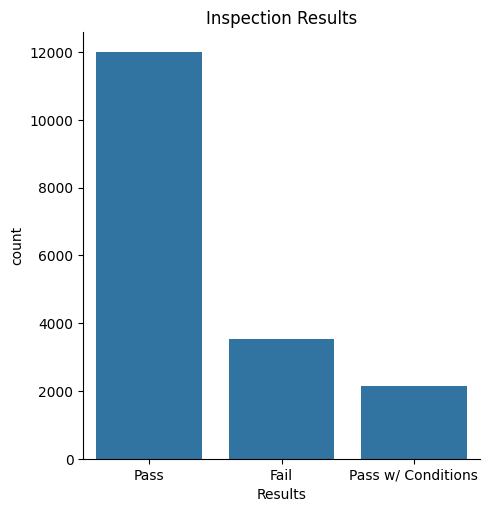

In [12]:
# view inspection results
sns.catplot(data = inspect,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

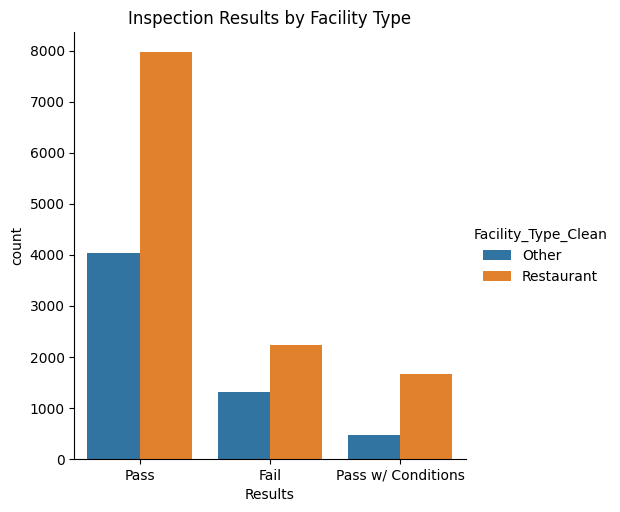

In [13]:
# view inspection results by facility type (restaurant or not)
sns.catplot(data = inspect,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

In [14]:
# view percentage of inspection results by facility type
matrix = pd.crosstab(inspect['Facility_Type_Clean'], inspect['Results'], normalize='index')
matrix

Results,Fail,Pass,Pass w/ Conditions
Facility_Type_Clean,,,
Other,0.225379,0.693698,0.080923
Restaurant,0.188558,0.671076,0.140366


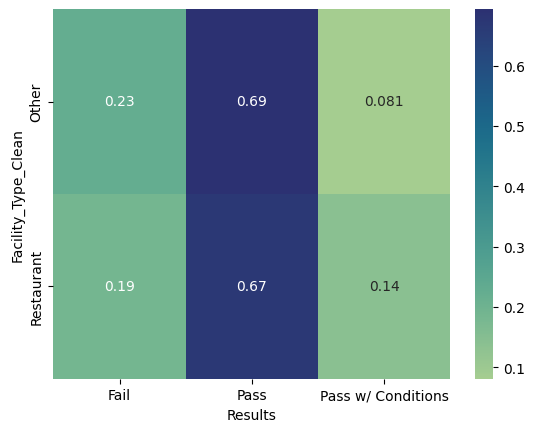

In [15]:
# draw a heatmap
sns.heatmap(matrix, annot=True, cmap='crest');

In [16]:
# view inspection results by risk and facility type
inspect.groupby(['Risk', 'Facility_Type_Clean'])['fail'].aggregate(['size', 'mean'])

size      mean
Risk            Facility_Type_Clean                
Risk 1 (High)   Other                3610  0.272022
                Restaurant           9606  0.336665
Risk 2 (Medium) Other                1366  0.368228
                Restaurant           2218  0.295311
Risk 3 (Low)    Other                 832  0.353365
                Restaurant             45  0.333333

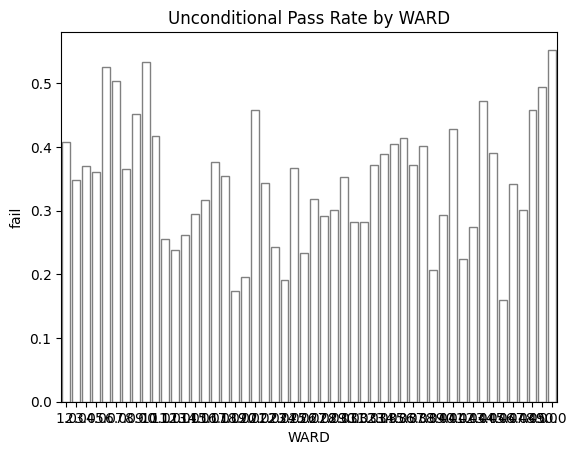

In [17]:
# view inspection results by ward
sns.barplot(data=inspect, x='WARD', y='fail', errorbar=None, edgecolor=".5", facecolor=(0, 0, 0, 0))

plt.title("Unconditional Pass Rate by WARD")
plt.show();

In [18]:
# view inspection results by days before license expired
inspect['lic_exp_days'] = pd.cut(inspect['lic_exp_days'], 10)
inspect.groupby('lic_exp_days')['fail'].aggregate(['size', 'mean'])

,size,mean
lic_exp_days,,
"(-1.242, 124.2]",2662,0.309917
"(124.2, 248.4]",2542,0.330842
"(248.4, 372.6]",2767,0.337188
"(372.6, 496.8]",3019,0.343822
"(496.8, 621.0]",2800,0.332143
"(621.0, 745.2]",1946,0.310894
"(745.2, 869.4]",19,0.421053
"(869.4, 993.6]",3,0.666667
"(993.6, 1117.8]",5,0.200000


## 2. Data Preprocessing and Cleaning

In [19]:
# drop datetime info
# ----
inspect = inspect.drop(['Inspection_Date',
                        'LICENSE_TERM_EXPIRATION_DATE',
                        'Inspection_MonthYear',
                        'lic_exp_days'],
                       axis = 1)
inspect.isnull().sum()

Risk                                              0
Inspection_Type                                   0
Results                                           0
Facility_Type_Clean                               0
criticalCount                                     0
seriousCount                                      0
minorCount                                        0
pastFail                                          0
pastCritical                                      0
pastSerious                                       0
pastMinor                                         0
timeSinceLast                                     0
firstRecord                                       0
WARD                                           1960
APPLICATION_TYPE                               1913
ageAtInspection                                1913
consumption_on_premises_incidental_activity       0
tobacco                                           0
package_goods                                     0
outdoor_pati

In [20]:
# view missing values
inspect[inspect['ageAtInspection'].isnull()].head(3)

,,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,fail
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
509380,EDWARDS ECC,Risk 1 (High),Canvass,Pass,Other,0,0,1,0,0,0,0,2.0,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.011970,49.253333,18.210000,0.773333,27.396624,9.850345,4.099851,0,0
519283,GOUDY ELEMENTARY,Risk 1 (High),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.003897,68.606667,10.030000,0.593333,22.432828,3.094951,29.541178,0,0
519296,SHERIDAN-ARGYLE APTS,Risk 1 (High),Canvass,Pass,Other,0,0,0,0,0,0,0,2.0,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.001580,59.050000,10.293333,0.653333,24.306625,3.712131,50.352858,0,0


In [21]:
# drop missing values (n=17677-1960=15717)
# ----
inspect = inspect.dropna()
inspect.shape

(15717, 37)

In [22]:
# problem 1
# when inspected facility is first-time recorded, certain value of these variables doesn't have the same meaning
# for example, pastMinor==0 doesn't mean it has no past minor violation, as it has never been inspected 
# the result can be biased if we mix the data of first-record (FR) and non-first-record (NFR) facilities

inspect[inspect['firstRecord']==1][['pastCritical', 'pastSerious', 'pastMinor','timeSinceLast','firstRecord']].head()

,,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord
Inspection_ID,DBA_Name,,,,,
269961,SEVEN STAR,0,0,0,2.0,1
507211,PANERA BREAD,0,0,0,2.0,1
507212,LITTLE QUIAPO RESTAURANT,0,0,0,2.0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,0,2.0,1
507219,TARGET STORE # T-2079,0,0,0,2.0,1


In [23]:
# solution 1
# since the test set consists of 84% NFR facilities, and it is reasonable to leverage the results of past inspection
# thus, one solution can be: use only the NFR data to train the model

# 2014 data: 3885 (NFR) + 738 (FR) =  4623
print('2014 data:',
      inspect_2014[inspect_2014['firstRecord']==0].shape,
      inspect_2014[inspect_2014['firstRecord']==1].shape,
      inspect_2014[inspect_2014['firstRecord']==1].shape[0] + inspect_2014[inspect_2014['firstRecord']==0].shape[0])

# train data: 5964(NFR) + 9753 (FR) = 15717
print('train data:',
      inspect[inspect['firstRecord']==0].shape,
      inspect[inspect['firstRecord']==1].shape,
      inspect[inspect['firstRecord']==1].shape[0] + inspect[inspect['firstRecord']==0].shape[0])

2014 data: (3885, 73) (738, 73) 4623
train data: (5964, 37) (9753, 37) 15717


In [24]:
# create inspect_NFR
# ----
inspect_NFR = inspect[inspect['firstRecord']==0].drop(columns='firstRecord')
print(inspect_NFR.shape, 
     inspect_NFR['fail'].sum()/inspect_NFR['fail'].count())

(5964, 36) 0.29107981220657275


In [25]:
# problem 2
# the 'Results' variable are decided by 'criticalCount' and 'seriousCount'
# the reason is, a facility will receive a ‘pass’ only when it has 'no critical or serious violations'
# see https://www.johnsnowlabs.com/marketplace/chicago-food-inspections/
# since these violations were counted during inspections, they are not appropriate training features

inspect[['criticalCount', 'seriousCount', 'minorCount', 'criticalFound', 'Results']].head(10)

,,criticalCount,seriousCount,minorCount,criticalFound,Results
Inspection_ID,DBA_Name,,,,,
269961,SEVEN STAR,0,0,2,0,Pass
507211,PANERA BREAD,0,0,3,0,Pass
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,Fail
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,Pass
507219,TARGET STORE # T-2079,0,2,6,0,Fail
509319,MOROLEON FOODS #2 INC.,0,1,4,0,Fail
509320,"SOL MAR Y TIERRA,INC.",0,0,3,0,Pass
509321,KORONA LOUNGE INC,0,0,2,0,Pass
509323,"CARNICERIA LA GLORIA NO. 2, INC.",0,0,3,0,Pass


In [26]:
# process features (solution 2: drop violation counts variables)
# ----
X = inspect_NFR.reset_index(drop=True).drop(columns = ['criticalCount', 'seriousCount', 'minorCount', 'criticalFound',
                                                       'Results', 'fail'])
X['WARD'] = pd.Categorical(X['WARD'])
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Restaurant,WARD_2.0,WARD_3.0,WARD_4.0,WARD_5.0,WARD_6.0,WARD_7.0,WARD_8.0,WARD_9.0,WARD_10.0,WARD_11.0,WARD_12.0,WARD_13.0,WARD_14.0,WARD_15.0,WARD_16.0,WARD_17.0,WARD_18.0,WARD_19.0,WARD_20.0,WARD_21.0,WARD_22.0,WARD_23.0,WARD_24.0,WARD_25.0,WARD_26.0,WARD_27.0,WARD_28.0,WARD_29.0,WARD_30.0,WARD_31.0,WARD_32.0,WARD_33.0,WARD_34.0,WARD_35.0,WARD_36.0,WARD_37.0,WARD_38.0,WARD_39.0,WARD_40.0,WARD_41.0,WARD_42.0,WARD_43.0,WARD_44.0,WARD_45.0,WARD_46.0,WARD_47.0,WARD_48.0,WARD_49.0,WARD_50.0,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
0,1,0,0,0,0.010959,2.964384,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,55.203333,18.010000,0.566667,11.557052,7.938602,19.102479,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0.046575,3.010959,0,0,0,0,0,0,0,0,0,0,0,0,0.000427,37.670000,12.050000,0.676667,10.614453,9.153201,22.294214,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,3,0.356164,9.961644,0,0,0,0,0,0,0,0,0,0,0,0,0.000507,42.033333,14.976667,0.666667,58.751068,27.453775,19.373789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.016438,10.219178,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,52.133333,12.420000,0.710000,2.748123,5.292909,3.345673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,6,0.356164,10.213699,0,0,0,0,0,0,0,0,0,0,0,0,0.000507,42.033333,14.976667,0.666667,20.645500,24.014439,11.093483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
# process target 
# ----
# I define "fail" as both "fail" and "pass w/ conditions." the reason is, quoted from the description of the dataset: 
# "establishments receiving a 'pass w/ conditions' were found to have critical or serious violations, but these were corrected during the inspection."
# since these establishments had violations found, they should be viewed as worth inspecting, hence the coding as 1
y = inspect_NFR['fail'].reset_index(drop=True)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Logistic Regression

- **Basic logic and assumptions**: Logistic regression models the natural logarithm (ln) of odds of Y as a linear combination of X variables. Since it assumes a linear relationship between the X variables and the ln(odds) of Y, multicollinearity between X variables should be avoided. 
- **Pros**: Coefficients and probabilistic predictions of logistic regression are highly interpretable. In addition, the model is less prone to overfitting compared to more complex models.
- **Cons**: Since logistic regression may not capture complex relationships in the data, it doesn't handle non-linear relationships well.
- **Reasons for slection**: Logistic regression is a widely-used statistical model. Its popularity, interpretability, and minimal need for hyperparameter tuning make it a good start to understand the data, and a baseline of prediction effectiveness before proceeding to machine learning models. 

In [28]:
# train the model
# ----
logit = LogisticRegression(max_iter=2000)
logit.fit(X, y)

# summary statistics
logit.score(X, y)

0.7255197853789404

In [29]:
# view the coefficents
logit_coef = pd.concat([pd.DataFrame(X.columns, columns=['Feature']),
                        pd.DataFrame(np.transpose(logit.coef_), columns=['Coefficient'])],
                       axis = 1)
logit_coef.head()

,Feature,Coefficient
0,pastFail,0.190000
1,pastCritical,0.223280
2,pastSerious,0.208137
3,pastMinor,0.128396
4,timeSinceLast,-0.014022


In [30]:
# view parameters
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
# tune hyperparameters
# ----
# set parameters
param_grid = {'max_iter': [2000],
              'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'saga']}
kfold = KFold(5, shuffle=True, random_state=224)

# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit, 
                          param_grid, 
                          cv=kfold)
logit_grid.fit(X, y)

/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means

GridSearchCV(cv=KFold(n_splits=5, random_state=224, shuffle=True),
             estimator=LogisticRegression(max_iter=2000),
             param_grid={'max_iter': [2000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky',
                                    'saga']})

In [32]:
# view grid search results
print(logit_grid.cv_results_['mean_test_score'], '\n\n', logit_grid.cv_results_['params'])

[0.7194825  0.71847649 0.71931485 0.7204878 ] 

 [{'max_iter': 2000, 'solver': 'lbfgs'}, {'max_iter': 2000, 'solver': 'liblinear'}, {'max_iter': 2000, 'solver': 'newton-cholesky'}, {'max_iter': 2000, 'solver': 'saga'}]


In [33]:
# retrain the model using the best performing parameters
# ----
logit = LogisticRegression(solver='saga', max_iter=2000).fit(X, y)

/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


###  Model 2: Random Forest Classifier

- **Basic logic and assumptions**: Random forest is basen on decision trees. It is an ensemble learning method as it constructs a multiple decision trees and, when dealing with classification tasks, combine their prediction results by majority vote. 
- **Pros**: Random forest can deal with complex relationship and interactions in the data. In addition, since it grows the individual trees by bootstrapping and random feature selection, which "decorrelate" trees in the forest, it is robust to overfitting. 
- **Cons**: While "feature importance" can be drawn from random forest, the idiosyncrasies of individual trees are basically random and hence uninterpretable. Also, compared to other "slow" learning methods as boosting, random forest often doesn't make as good predictions. 
- **Reasons for slection**: Moving from a statistical model to machine learning models, random forest can be a good start. Since it is robust to overfitting and works well with minimal hyperparameter tuning, it can serve as a baseline of prediction effectiveness when using machine learning models. 

In [34]:
# train the model
# ----
rf = RandomForestClassifier(random_state=224)
rf.fit(X, y)
rf.score(X, y)

0.9991616364855801

In [35]:
# train a decision tree model (for comparision)
# ----
dtr = DecisionTreeClassifier(random_state=224)
dtr.fit(X, y)
dtr.score(X, y)

0.9991616364855801

In [36]:
# compare cv-socres
# as described above, random forest is more robust to overfitting 
print('Random Forest:', '\n', cross_val_score(rf, X, y, cv=kfold), '\n\n', 
      'Decision Tree:', '\n', cross_val_score(dtr, X, y, cv=kfold))

Random Forest: 
 [0.72757754 0.71584241 0.7116513  0.70410729 0.71308725] 

 Decision Tree: 
 [0.620285   0.65465214 0.61357921 0.60435876 0.64177852]


In [37]:
# tune hyperparameters
# ----
rf_grid = GridSearchCV(rf,
                       {'criterion': ['gini', 'entropy'],
                        'n_estimators': [100, 200]},
                       cv=kfold,
                       scoring='accuracy')
rf_grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=224, shuffle=True),
             estimator=RandomForestClassifier(random_state=224),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [38]:
# view grid search results
print(rf_grid.cv_results_['mean_test_score'], '\n\n', rf_grid.cv_results_['params'])

[0.71445316 0.7159614  0.71009285 0.71311088] 

 [{'criterion': 'gini', 'n_estimators': 100}, {'criterion': 'gini', 'n_estimators': 200}, {'criterion': 'entropy', 'n_estimators': 100}, {'criterion': 'entropy', 'n_estimators': 200}]


In [39]:
# retrain the model using the best performing parameters
# ----
dtr = RandomForestClassifier(criterion='gini', n_estimators=200, random_state=224).fit(X, y)

### Model 3: Gradient Boosting Classifier

- **Basic logic and assumptions**: Like rondom forest, gradient boosting is also a ensemble learning method. However, it builds trees sequentially, with each tree correcting the errors made by previous ones. 
- **Pros**: As random forest does, gradient boosting can deal with complex relationship and interactions in the data. What makes gradient boosting stands out is by boosting weak learners, it learns slower but achieves higher predictive accuracy.
- **Cons**: Like random forest, gradient boosting can provide "feature importance," which is less interpretable than logistic regression coefficients. In addition, gradient boosting requires more hyperparameter tuning to prevent overfitting (e.g., by including regularization terms such as the depth of the trees) and incerase performance (e.g., by tuning learning rates and number of estimators). Given its "slow" learning essence, this can be a computationally complex and time-consuming process.
- **Reasons for slection**: Gradient Boosting models and their variations (such as XGBoost) are considered state-of-the-art for many machine learning tasks. It is appropriate to use it as the final model. 

In [40]:
# tune learning rate and number of estimators
# ----
# since there is a trade-off between learning_rate and n_estimators, three pairs of them are specified and tested here
# grid search is not considered because conducting 3x3 CV would be unnecessary and also computationally expensive

ne = [100, 200, 300]
lr = [0.1, 0.05, 0.333]

for i,j in zip(ne,lr):
    gb = GradientBoostingClassifier(n_estimators=i, learning_rate=j, random_state=224).fit(X, y)
    scores = cross_val_score(gb, X, y, cv=kfold)
    print('n_estimators=', i, 'learning_rate=', j, '\n',
          'cv_scores=', scores, '\n', 
          'mean_cv_scores=', sum(scores)/len(scores), '\n')

n_estimators= 100 learning_rate= 0.1 
 cv_scores= [0.72757754 0.72338642 0.70578374 0.70494552 0.71392617] 
 mean_cv_scores= 0.7151238769781217 

n_estimators= 200 learning_rate= 0.05 
 cv_scores= [0.73093043 0.7225482  0.70829841 0.70243085 0.71057047] 
 mean_cv_scores= 0.71495566981891 

n_estimators= 300 learning_rate= 0.333 
 cv_scores= [0.69237217 0.70159262 0.68315172 0.68063705 0.69211409] 
 mean_cv_scores= 0.6899735312814685 



In [41]:
# tune another hyperparameter (max depth of the trees)
# ----
# use the best learning rate and number of estimators pair to retrain the model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=224).fit(X, y)

# conduct grid serach on max depth of the trees
gb_grid = GridSearchCV(gb,
                       {'max_depth': [1, 2, 3, 4, 5]},
                       cv=kfold,
                       scoring='accuracy')
gb_grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=224, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=224),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [42]:
# view grid search results
print(gb_grid.cv_results_['mean_test_score'], '\n\n', gb_grid.cv_results_['params'])

[0.7119361  0.7139491  0.71512388 0.7109322  0.70757889] 

 [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}]


In [43]:
# retrain the model using the best performing parameters
# ----
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=224).fit(X, y)

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [44]:
# define the scoring metrics
# ----
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

In [45]:
# perform cross-validation for the logit model
# ----
logit_met = cross_validate(logit, X, y,
                           cv=kfold,
                           scoring=scoring)
logit_met

/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/takunwang/project/23F-CSS/23F-CSS-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means

{'fit_time': array([3.61216402, 3.72289801, 3.7301569 , 3.74972701, 3.82514191]),
 'score_time': array([0.00603986, 0.00370598, 0.00373888, 0.00664711, 0.00555992]),
 'test_accuracy': array([0.72925398, 0.72673931, 0.72338642, 0.71332775, 0.70973154]),
 'test_recall': array([0.1035503 , 0.11470588, 0.12427746, 0.13675214, 0.11634349]),
 'test_precision': array([0.63636364, 0.609375  , 0.61428571, 0.55172414, 0.60869565]),
 'test_f1': array([0.17811705, 0.19306931, 0.20673077, 0.21917808, 0.19534884])}

In [46]:
# metrics for the logit model
for _ in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    metrics = logit_met[_]
    print(f"{_[5:]}: {metrics.mean():.3f}")

accuracy: 0.720
recall: 0.119
precision: 0.604
f1: 0.198


In [47]:
# metrics for the random forest model
# ----
rf_met = cross_validate(rf, X, y, 
                           cv=kfold,
                           scoring=scoring)

for _ in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    metrics = rf_met[_]
    print(f"{_[5:]}: {metrics.mean():.3f}")

accuracy: 0.714
recall: 0.120
precision: 0.542
f1: 0.196


In [48]:
# metrics for the gradient boosting model
# ----
gb_met = cross_validate(gb, X, y,
                           cv=kfold, 
                           scoring=scoring)

for _ in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    metrics = gb_met[_]
    print(f"{_[5:]}: {metrics.mean():.3f}")

accuracy: 0.715
recall: 0.112
precision: 0.559
f1: 0.186


**Discussion:** Which of these metrics would you want to prioritize when conducting predictive auditing in this context? Why?

Accuracy score can be misleading in this context. Since 70.9% of the establishments in my training set have the outcome coded as 0 (not fail), simply predicting every outcome as 0 can have a 0.709 accuracy score. 

The best recall score is 0.120. This means that out of all the establishments that failed, only 12% at best of them are successfully predicted. On the other hand, the best precision scores is 0.604, which means that out of all the predicted failed establishments, 60.4% of them actually failed. 

The latter metric, precision score, is more relevant in this context. Since our goal is to decide establishments to prioritize when conducting predictive auditing, a model with higher precision score raise the success rate of auditing. Precisely, there are 28.1% of establishments which failed, a 60.4% precision score can contribute significantly to the effectiveness of auditing. 

Selecting precision score as the main metric, I will choose the logistic regression model for policy simulation.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

In [49]:
# inspect regression coefficients of the logit model
logit_sm = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_sm.summary())

Optimization terminated successfully.
         Current function value: 0.561187
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   fail   No. Observations:                 5964
Model:                          Logit   Df Residuals:                     5884
Method:                           MLE   Df Model:                           79
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                 0.06952
Time:                        11:47:26   Log-Likelihood:                -3346.9
converged:                       True   LL-Null:                       -3597.0
Covariance Type:            nonrobust   LLR p-value:                 1.919e-62
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                     

In [50]:
# create feature importance dataframe
# ----
# the random forest model
rf_fea_imp = pd.concat([pd.DataFrame(X.columns, columns=['Feature']), 
                        pd.DataFrame(np.transpose(rf.feature_importances_), columns=['Importance'])],
                       axis = 1)

# the gradient boosting model
gb_fea_imp = pd.concat([pd.DataFrame(X.columns, columns=['Feature']), 
                        pd.DataFrame(np.transpose(gb.feature_importances_), columns=['Importance'])],
                       axis = 1)

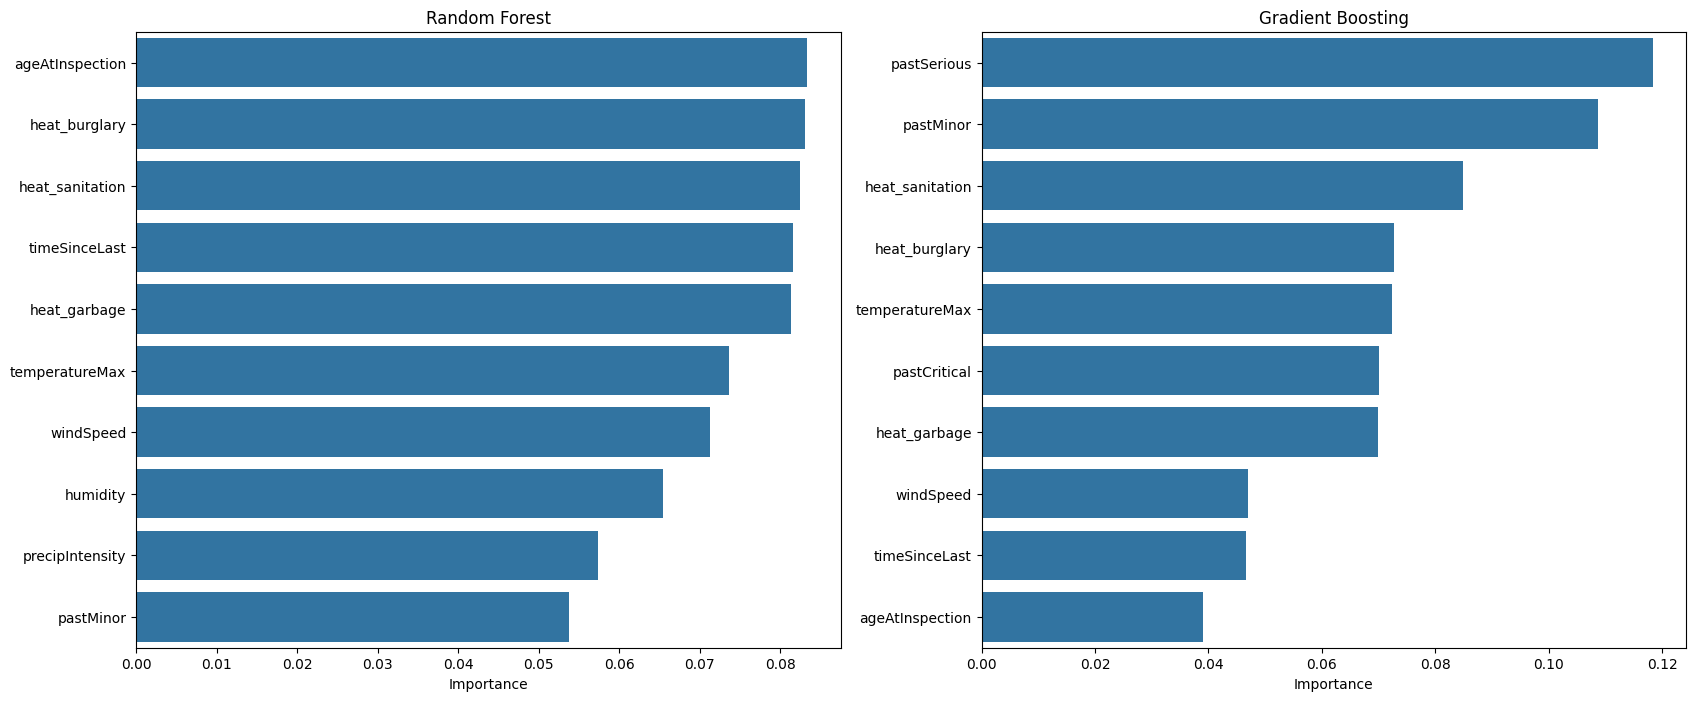

In [51]:
# inspect feature importance of the random forest and gradient boosting model
plt.figure(figsize=(20, 8))

# Random Forest
plt.subplot(1,2,1)
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = rf_fea_imp.nlargest(10, 'Importance'))
plt.title('Random Forest')
plt.ylabel('')

# Gradient Boosting
plt.subplot(1,2,2)
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = gb_fea_imp.nlargest(10, 'Importance'))
plt.title('Gradient Boosting')
plt.ylabel('');

**Discussion:** Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don’t have available in this analysis?

Based on the logistic regression model, the variables that are statiscally significant (p < 0.05) include: past violations found ('pastCritical', 'pastSerious,' and 'pastMinor'), 'outdoor_patio,' 'temperatureMax,' and 'WARD.'

Compared this result with the feature importance results of the random forest model and the gradient boosting model, we can see that the result of gradient boosting is more aligned with the result of logistic regression. Specifically, it has 'pastCritical', 'pastSerious,' and 'pastMinor' all on the top 10 of features. It is quite reasonable to anticipate that violations found in the past can be a sound predictor of whether violations would be found this time. 

To improve the prediction, I would wish to include the violation types (instead of just violation counts). If we can first find out which types of violation are connected to which types of establishments, we can build a more specific model to conduct the prediction. Other features I would wish to incorporate would be the number of employers and the revenue of the establishments. It would be interesting to find out that whether the scale of an establishment has anything to do with its risk of violation. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [52]:
# choose the logit model to predict outcomes and probabilities
# ----
pred = pd.DataFrame(logit.predict_proba(X), columns=['prob_pass', 'prob_fail'])
pred = pd.concat([pred, y], axis=1)
pred.head()

,prob_pass,prob_fail,fail
0,0.756339,0.243661,1
1,0.759367,0.240633,0
2,0.743732,0.256268,0
3,0.790794,0.209206,0
4,0.682584,0.317416,0


In [53]:
# order audits by their probability of detecting a "Fail" score
# ----
pred_audit = pred.sort_values(by='prob_fail', ascending=False)
pred_audit.head()

,prob_pass,prob_fail,fail
716,0.140726,0.859274,1
3012,0.180934,0.819066,0
5503,0.186336,0.813664,1
1733,0.188306,0.811694,0
4102,0.205938,0.794062,0


In [54]:
# simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 500 observations at random
# ----
rand_audit = pred.sample(500, random_state=224)
rand_audit.head()

,prob_pass,prob_fail,fail
4985,0.840387,0.159613,0
3292,0.795549,0.204451,0
1068,0.741760,0.258240,0
4191,0.554218,0.445782,1
4346,0.782499,0.217501,0


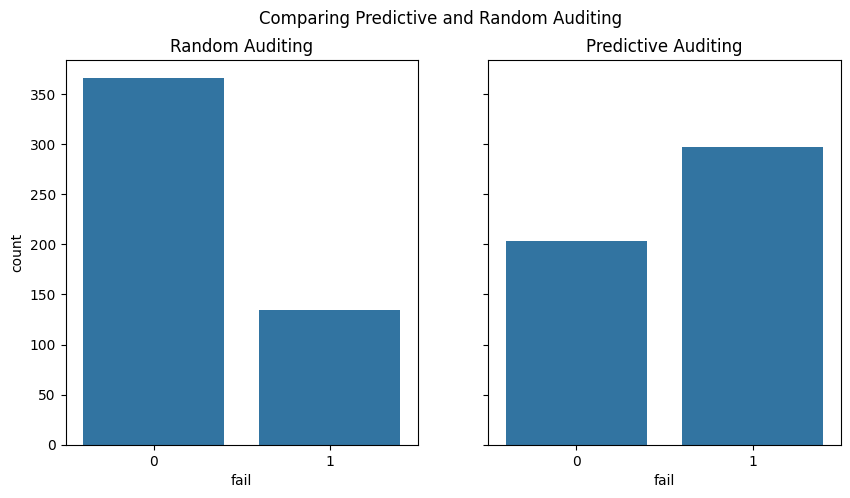

In [55]:
# plot the distribution of pass/fail among the predictive auditing and random auditing
# ----
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Comparing Predictive and Random Auditing')

# random auditing
sns.countplot(ax=axes[0], data=rand_audit, x='fail')
axes[0].set_title('Random Auditing')

# predictive auditing
sns.countplot(ax=axes[1], data=pred_audit[:500], x='fail')
axes[1].set_title('Predictive Auditing');

**Discussion:** How well did random audits do? How did random auditing compare to predictive auditing?

As mentioned earlier, selecting a model with about a 0.60 percision score can expect a predicitve auditing finding about 60% of establishments fail. Compared to random auditing, with about 28% of failing establishments, this is quite an improvement. 

Note that with a cutoff point of 0.50, the logit model only predicts 372 fail=1 cases. With the majority of cases having a probability of failing < 0.50, the effectiveness of predictive auditing can decrease when the number of picks increases.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [56]:
# create inspect_2014_NFR
# ----
inspect_2014_NFR = inspect_2014[inspect_2014['firstRecord']==0].drop(columns='firstRecord')
inspect_2014_NFR.shape

(3885, 72)

In [57]:
# list column names
X.columns

Index(['pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'ageAtInspection', 'consumption_on_premises_incidental_activity',
       'tobacco', 'package_goods', 'outdoor_patio',
       'public_place_of_amusement', 'limited_business_license',
       'childrens_services_facility_license', 'tavern',
       'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'Risk_Risk 2 (Medium)',
       'Risk_Risk 3 (Low)', 'Facility_Type_Clean_Restaurant', 'WARD_2.0',
       'WARD_3.0', 'WARD_4.0', 'WARD_5.0', 'WARD_6.0', 'WARD_7.0', 'WARD_8.0',
       'WARD_9.0', 'WARD_10.0', 'WARD_11.0', 'WARD_12.0', 'WARD_13.0',
       'WARD_14.0', 'WARD_15.0', 'WARD_16.0', 'WARD_17.0', 'WARD_18.0',
       'WARD_19.0', 'WARD_20.0', 'WARD_21.0', 'WARD_22.0', 'WARD_23.0',
       'WARD_24.0', 'WARD_25.0', 'WARD_26.

In [58]:
# drop columns and missing values
# ----
inspect_2014_NFR = inspect_2014_NFR[['pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 
                                     'timeSinceLast', 'ageAtInspection', 'consumption_on_premises_incidental_activity',
                                     'tobacco', 'package_goods', 'outdoor_patio',
                                     'public_place_of_amusement', 'limited_business_license',
                                     'childrens_services_facility_license', 'tavern',
                                     'regulated_business_license', 'filling_station',
                                     'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
                                     'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
                                     'heat_garbage', 'heat_sanitation', 
                                     'Risk',
                                     'Facility_Type_Clean',
                                     'WARD',
                                     'APPLICATION_TYPE',
                                     'Results']]
inspect_2014_NFR = inspect_2014_NFR.dropna()

In [59]:
# process features
# ----
X_test = inspect_2014_NFR.drop(columns='Results').reset_index(drop=True)
X_test['WARD'] = pd.Categorical(X_test['WARD'])
X_test = pd.get_dummies(X_test, drop_first=True, dtype=int)
X_test.head()

,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Restaurant,WARD_2.0,WARD_3.0,WARD_4.0,WARD_5.0,WARD_6.0,WARD_7.0,WARD_8.0,WARD_9.0,WARD_10.0,WARD_11.0,WARD_12.0,WARD_13.0,WARD_14.0,WARD_15.0,WARD_16.0,WARD_17.0,WARD_18.0,WARD_19.0,WARD_20.0,WARD_21.0,WARD_22.0,WARD_23.0,WARD_24.0,WARD_25.0,WARD_26.0,WARD_27.0,WARD_28.0,WARD_29.0,WARD_30.0,WARD_31.0,WARD_32.0,WARD_33.0,WARD_34.0,WARD_35.0,WARD_36.0,WARD_37.0,WARD_38.0,WARD_39.0,WARD_40.0,WARD_41.0,WARD_42.0,WARD_43.0,WARD_44.0,WARD_45.0,WARD_46.0,WARD_47.0,WARD_48.0,WARD_49.0,WARD_50.0,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
0,0,0,0,0,0.794521,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,12.034833,7.194320,1.219222,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,2,0.660274,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,26.292725,27.837325,12.401466,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,3,0.964384,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.662066,27.638311,78.175677,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,3,1.000000,11.660274,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.013333,11.800000,0.650000,18.279236,0.078497,7.435346,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,4,0.926027,2.989041,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.013333,11.800000,0.650000,18.313415,0.019499,4.303583,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [60]:
# check data shapes
print(X_test.shape, '\n', X.shape)

(3407, 80) 
 (5964, 79)


In [61]:
# check difference of columns
X_test.columns.difference(X.columns)

Index(['APPLICATION_TYPE_C_LOC'], dtype='object')

In [62]:
# view variables values
X_test['APPLICATION_TYPE_C_LOC'].value_counts()

APPLICATION_TYPE_C_LOC
0    3406
1       1
Name: count, dtype: int64

In [63]:
# drop it
# ----
X_test = X_test.drop(columns='APPLICATION_TYPE_C_LOC')

In [64]:
# process target 
# ----
inspect_2014_NFR['fail'] = inspect_2014_NFR['Results'].replace(['Pass','Pass w/ Conditions','Fail'],
                                                               [0,1,1])
y_test = inspect_2014_NFR['fail'].reset_index(drop=True)
y_test

0       1
1       0
2       1
3       0
4       1
       ..
3402    0
3403    0
3404    0
3405    0
3406    0
Name: fail, Length: 3407, dtype: int64

In [65]:
# predict and compare 
# ----
pred = pd.concat([pd.DataFrame(logit.predict_proba(X_test)), pd.DataFrame(logit.predict(X_test)), y_test], 
                 axis=1)
pred.columns = ['prob_pass', 'prob_fail', 'pred_0.5', 'actual']
pred.head()

,prob_pass,prob_fail,pred_0.5,actual
0,0.793081,0.206919,0,1
1,0.815905,0.184095,0,0
2,0.713009,0.286991,0,1
3,0.815279,0.184721,0,0
4,0.752663,0.247337,0,1


In [66]:
# view y_test values
y_test.value_counts()

fail
0    2213
1    1194
Name: count, dtype: int64

In [67]:
# create a different decision boundary
# ----
boundary = 1194/(2213+1194)
boundary

0.35045494570002933

In [68]:
# predict using the boundary as cutoff point
# ----
pred['pred_0.35'] = np.where(pred['prob_fail']>boundary, 1, 0)
pred.head()

,prob_pass,prob_fail,pred_0.5,actual,pred_0.35
0,0.793081,0.206919,0,1,0
1,0.815905,0.184095,0,0,0
2,0.713009,0.286991,0,1,0
3,0.815279,0.184721,0,0,0
4,0.752663,0.247337,0,1,0


In [69]:
# view number of fails predicted
print(pred['pred_0.5'].sum(), '\n', pred['pred_0.35'].sum())

176 
 835


In [70]:
# confusion matrix when cutoff=0.5
pd.crosstab(pred['pred_0.5'], pred['actual'], normalize='index')

actual,0,1
pred_0.5,,
0,0.655525,0.344475
1,0.539773,0.460227


In [71]:
# confusion matrix when cutoff=0.35
pd.crosstab(pred['pred_0.35'], pred['actual'], normalize='index')

actual,0,1
pred_0.35,,
0,0.684681,0.315319
1,0.541317,0.458683


**Discussion:** After you make your predictions, choose a metric that you think makes the most sense from a policy perspective, explain your choice, and discuss your model’s performance.

I select the logistic regression model based on its highest precision score. Applying this classifier to the 2014 test data, the model makes 835 fail=1 predictions with a 46% precision score (cutoff point = 0.35), which indicates a 11% improvement when compared to 35% fail rate in the data. 

Note that since this model is trained and applied only for establishments that were not recordeded for the first time, predictive auditing based on the model's prediction only works for establishments with past inspection record. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

**Answer:**
As described above, an accuracy score can be misleading particularly when dealing with "imbalanced" target labels. Moreover, which metrics to select depends on the task at hand. In this context, we are training a model to conduct predictive auditing, and thus precision score is the most relevant metric. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**Answer:** 
I doubt that establishments can effectively leverage the algorithm and avoid predictive auditing. For one thing, the most statisticially significant variables are the count of past violations found. In terms of which establishments can only change their behavior by complying to regulations. For another, establishments may want to change their behavior in terms of the top variables in feature importance. However, feature importance doesn't provide information of the underlying complex relationship and interaction, thus establishments cannot really decide how to change their behavior to lower their predictied failing probability. 

Even if establishments can effectively "learn" from the algorithm, policymakers can still conduct random and predictive auditing at the same time (e.g., 50% random and 50% predictive). In this way, we can lower the expected gain of establishments tinkering their features. If that expected gain is lowered under certain amount, it can be less costly for establishments to simply try to comply with regulations.